In [ ]:
#Show ALL outputs in cell, not only last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#Set relative path mapping for module imports
import sys

sys.path.append("../../")

In [ ]:
# External Dependencies
import numpy as np
import pandas as pd

In [ ]:
#Read in pickled data
X_y_data = pd.read_pickle("../data/interim/X_y_data.pkl")
X = pd.read_pickle("../data/interim/X.pkl")
y = pd.read_pickle("../data/interim/y.pkl")

In [ ]:
#Recap data structure
X_y_data.head()
X_y_data.shape

## Model Selection

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "https://scikit-learn.org/stable/_static/ml_map.png")

In [2]:
#Which algorithms/estimators are options?
    #The estimator you choose for your project will depend on the data set you have and the problem that you are trying to solve.

# Fit Model & Predict

In [3]:
# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline

# Validation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import svm
# from xgboost import XGBClassifier

# Evaluation metrics
# Plot the confusion matrix at the end of the tutorial
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# from sklearn.externals import joblib

In [4]:
from sklearn.datasets import make_classification, load_breast_cancer

X = load_breast_cancer()['data'].copy()
y = load_breast_cancer()['target'].copy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [6]:
# PIPELINES

# Logistic Regression pipeline
lr_pipeline = imbpipeline([
    ['smote', SMOTE(random_state=11)],
    ['scaler', MinMaxScaler()],
#     ['pca', PCA(n_components=2)],
    ['LR', LogisticRegression(random_state=11, 
                              max_iter=1000)]
])

# # Decision Trees pipeline
# dt_pipeline = imbpipeline([
#     ['smote', SMOTE(random_state=11)],
#     ['scaler', MinMaxScaler()],
# #     ['pca', PCA(n_components=2)],
#     ['DT', DecisionTreeClassifier(random_state=11)]
# ])

# # Random Forest pipeline
# rf_pipeline = imbpipeline([
#     ['smote', SMOTE(random_state=11)],
#     ['scaler', MinMaxScaler()],
# #     ['pca', PCA(n_components=2)],
#     ['RF', RandomForestClassifier(random_state=11)]
# ])

# # K-Nearest Neighbors pipeline
# knn_pipeline = imbpipeline([
#     ['smote', SMOTE(random_state=11)],
#     ['scaler', MinMaxScaler()],
# #     ['pca', PCA(n_components=2)],
#     ['KNN', KNeighborsClassifier()]
# ])


# # Support Vector Machines pipeline
# svm_pipeline = imbpipeline([
#     ['smote', SMOTE(random_state=11)],
#     ['scaler', MinMaxScaler()],
# #     ['pca', PCA(n_components=2)],
#     ['SVM', svm.SVC(random_state=11)]
# ])

# # XGBoost pipeline
# xgb_pipeline = imbpipeline([
#     ['smote', SMOTE(random_state=11)],
#     ['scaler', MinMaxScaler()],
# #     ['pca', PCA(n_components=2)],
#     ['XGB', XGBClassifier(random_state=11)]
# ])

In [7]:
# CHOSEN HYPERPARAMETER GRIDS

param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

lr_param_grid = {'LR__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Logistic Regression hyperparameter grid
# lr_param_grid = [{
#     'LR__penalty': ['l1', 'l2'],
#     'LR__C': param_range_fl,
#     'LR__solver': ['liblinear']}
# ]

# Decision Trees hyperparameter grid
dt_param_grid = [{
    'DT__criterion': ['gini', 'entropy'],
    'DT__min_samples_leaf': param_range,
    'DT__max_depth': param_range,
    'DT__min_samples_split': param_range[1:]}
]

# Random Forest hyperparameter grid
rf_param_grid = [{
    'RF__min_samples_leaf': param_range,
    'RF__max_depth': param_range,
    'RF__min_samples_split': param_range[1:]}
]

# # K-Nearest Neighbors hyperparameter grid
# knn_param_grid = [{
#     'KNN__n_neighbors': param_range,
#     'KNN__weights': ['uniform', 'distance'],
#     'KNN__metric': ['euclidean', 'manhattan']}
# ]

# # Support Vector Machines hyperparameter grid
# svm_param_grid = [{
#     'SVM__kernel': ['linear', 'rbf'], 
#     'SVM__C': param_range}
# ]

# # XGBoost hyperparameter grid
# xgb_param_grid = [{
#     'XGB__learning_rate': learning_rates,
#     'XGB__max_depth': param_range,
#     'XGB__min_child_weight': param_range[:2],
#     'XGB__subsample': param_range_fl,
#     'XGB__n_estimators': n_estimators}
# ]

In [9]:
# SET UP GRID SEARCH CV

# scoring = 'accuracy'
scoring = 'roc_auc'
stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=11)
    
# Logistic Regression grid search CV
lr_grid_search = GridSearchCV(
    estimator=lr_pipeline, 
    param_grid=lr_param_grid, 
    scoring=scoring,
    cv=stratified_kfold,
    n_jobs=-1
)

# # Decision Trees grid search CV
# dt_grid_search = GridSearchCV(
#     estimator=dt_pipeline, 
#     param_grid=dt_param_grid, 
#     scoring=scoring,
#     cv=stratified_kfold,
#     n_jobs=-1
# )

# # Random Forest grid search CV
# rf_grid_search = GridSearchCV(
#     estimator=rf_pipeline, 
#     param_grid=rf_param_grid, 
#     scoring=scoring,
#     cv=stratified_kfold,
#     n_jobs=-1
# )

# # K-Nearest Neighbors grid search CV
# knn_grid_search = GridSearchCV(
#     estimator=knn_pipeline, 
#     param_grid=knn_param_grid, 
#     scoring=scoring,
#     cv=stratified_kfold,
#     n_jobs=-1
# )

# # Support Vector Machines grid search CV
# svm_grid_search = GridSearchCV(
#     estimator=svm_pipeline, 
#     param_grid=svm_param_grid, 
#     scoring=scoring,
#     cv=stratified_kfold,
#     n_jobs=-1
# )

# # XGBoost grid search CV
# xgb_grid_search = GridSearchCV(
#     estimator=xgb_pipeline, 
#     param_grid=xgb_param_grid, 
#     scoring=scoring,
#     cv=stratified_kfold,
#     n_jobs=-1
# )

In [10]:
%%time
# FIT MODELS
 
grids = [
    lr_grid_search,
#     dt_grid_search,
#     rf_grid_search,
#     knn_grid_search,
#     svm_grid_search,
#     xgb_grid_search
]

for pipe in grids:
    pipe.fit(X_train,y_train)

CPU times: user 176 ms, sys: 80 ms, total: 256 ms
Wall time: 1.36 s


In [11]:
%%time 
# PREDICT & SCORE MODELS

grid_dict = {
    0: 'Logistic Regression', 
#     1: 'Decision Trees', 
#     2: 'Random Forest', 
#     3: 'K-Nearest Neighbors', 
#     4: 'Support Vector Machines', 
#     5: 'XGBoost'
}

for i, model in enumerate(grids):
    
    y_pred = model.predict(X_test)
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
    
    print('{} Cross Validation Training {}: {}'.format(grid_dict[i], scoring, model.best_score_))
    print('{} Test {}: {}'.format(grid_dict[i], scoring, model.score(X_test,y_test)), '\n')
    
#     print('{} Test Accuracy: {}'.format(grid_dict[i], accuracy_score(y_test, y_pred)))
#     print('{} Test Precision: {}'.format(grid_dict[i], precision_score(y_test, y_pred)))
#     print('{} Test Recall: {}'.format(grid_dict[i], recall_score(y_test, y_pred)))
#     print('{} Test F1 Score: {}'.format(grid_dict[i], f1_score(y_test, y_pred)))

Logistic Regression Best Params: {'LR__C': 10}
Logistic Regression Cross Validation Training roc_auc: 0.9972013366750209
Logistic Regression Test roc_auc: 0.9798280423280423 

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 3.55 ms


In [ ]:
# PREDICT & SCORE MODELS

grid_dict = {
    0: 'Logistic Regression', 
    1: 'Decision Trees', 
    2: 'Random Forest', 
#     3: 'K-Nearest Neighbors', 
#     4: 'Support Vector Machines', 
#     5: 'XGBoost'
}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    
    # Fit grid search
    gs.fit(X_train, y_train)
    
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
        
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
dump_file = 'best_gs_pipeline.pkl'
# joblib.dump(best_gs, dump_file, compress=1)
# print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

## Best Model Evaluation Metrics

In [12]:
# Pick best model based on scoring above
clf_best = lr_grid_search

In [13]:
# VERIFY TRAINING CV RESULTS
clf_best.cv_results_

{'mean_fit_time': array([0.01061495, 0.01022577, 0.01185473, 0.01446915, 0.01881274,
        0.03777989, 0.04814736]),
 'std_fit_time': array([0.00023327, 0.00042811, 0.00079089, 0.00069088, 0.00155039,
        0.00138388, 0.01013405]),
 'mean_score_time': array([0.00237528, 0.00224646, 0.00200144, 0.00216881, 0.00206216,
        0.00229565, 0.00148439]),
 'std_score_time': array([5.32452740e-05, 1.19533469e-04, 6.37576434e-05, 9.57278224e-05,
        4.45712352e-04, 8.69347361e-06, 4.79108645e-05]),
 'param_LR__C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'LR__C': 0.001},
  {'LR__C': 0.01},
  {'LR__C': 0.1},
  {'LR__C': 1},
  {'LR__C': 10},
  {'LR__C': 100},
  {'LR__C': 1000}],
 'split0_test_score': array([0.98467221, 0.98688827, 0.99279778, 0.99796861, 0.99649123,
        0.99058172, 0.99095106]),
 'split1_test_score': array([0.98762696

In [14]:
# Same number of values as combinations of grid search parameter sets, run cv=k number of times and averaged
scores = clf_best.cv_results_['mean_test_score'].reshape(-1).T
print(scores)
# heatmap = mglearn.tools.heatmap(
# scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
# xticklabels=param_grid['logisticregression__C'],
# yticklabels=param_grid['tfidfvectorizer__ngram_range'])
# plt.colorbar(heatmap)

[0.98619245 0.98755221 0.99249659 0.99713208 0.99720134 0.99486875
 0.99301873]


In [15]:
# CONFUSION MATRIX

y_pred = clf_best.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[38,  4],
       [ 2, 70]])

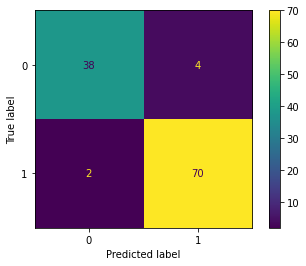

In [16]:
plot_confusion_matrix(clf_best, X_test, y_test);

ROC AUC: 0.980 



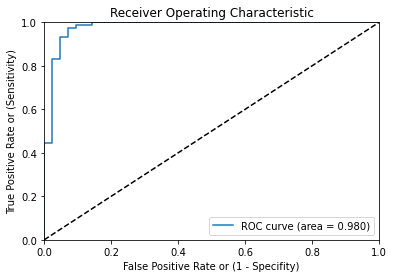

In [18]:
# AUC & ROC CURVE
y_pred = clf_best.decision_function(X_test)
# y_pred = clf_best.predict(X_test)

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('ROC AUC: %.3f' % roc_auc,'\n')

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");

In [ ]:
https://pandas-ml.readthedocs.io/en/latest/index.html

In [ ]:
https://www.scikit-yb.org/en/latest/